<a href="https://colab.research.google.com/github/aryan-553/Crop-Disease-Detection/blob/master/AppleDIseaseDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mounting Google drive for importing dataset.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os

!unrar x "/content/drive/My Drive/new_dataset.rar" "/tmp/"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/My Drive/new_dataset.rar

Creating    /tmp/new_dataset                                          OK
Creating    /tmp/new_dataset/train                                    OK
Creating    /tmp/new_dataset/train/Apple__Apple_scab                  OK
Extracting  /tmp/new_dataset/train/Apple__Apple_scab/03eccb1a-0368-4ac7-9f48-7546037b775a___FREC_Scab 3334.JPG       0%  OK 
Extracting  /tmp/new_dataset/train/Apple__Apple_scab/03eccb1a-0368-4ac7-9f48-7546037b775a___FREC_Scab 3334_270deg.JPG       0%  OK 
Extracting  /tmp/new_dataset/train/Apple__Apple_scab/03eccb1a-0368-4ac7-9f48-7546037b775a___FREC_Scab 3334_90deg.JPG       0%  OK 
Extracting  /tmp/new_dataset/train/Apple__Apple_scab/03eccb1a-0368-4ac7-9f48-7546037b775a___FREC_Scab 3334_new30degFlipLR.JPG       0%  OK 
Extracting  /tmp/new_dataset/train/Apple__Apple_scab/06cf74b6-d895-4a09-b3b1-bc63579f8c33__

In [3]:
Apple__Apple_scab = os.path.join('/tmp/new_dataset/train/Apple__Apple_scab')
Apple__healthy = os.path.join('/tmp/new_dataset/train/Apple__healthy')
Apple__Black_rot = os.path.join('/tmp/new_dataset/train/Apple__Black_rot')
Apple__Cedar_apple_rust = os.path.join('/tmp/new_dataset/train/Apple__Cedar_apple_rust')

print('total training Apple__Apple_scab images:', len(os.listdir(Apple__Apple_scab)))
print('total training Apple__healthy images:', len(os.listdir(Apple__healthy)))
print('total training Apple__Black_rot images:', len(os.listdir(Apple__Black_rot)))
print('total training Apple__Cedar_apple_rust images:', len(os.listdir(Apple__Cedar_apple_rust)))


total training Apple__Apple_scab images: 213
total training Apple__healthy images: 217
total training Apple__Black_rot images: 203
total training Apple__Cedar_apple_rust images: 162


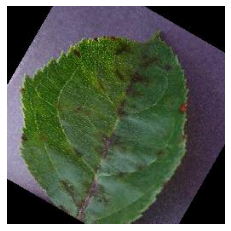

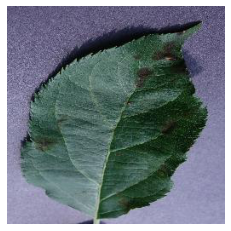

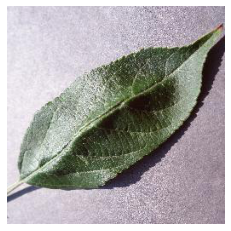

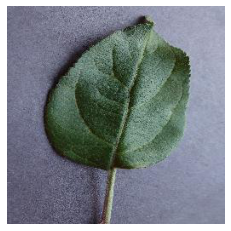

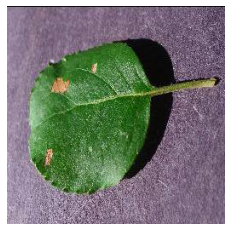

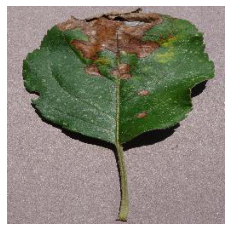

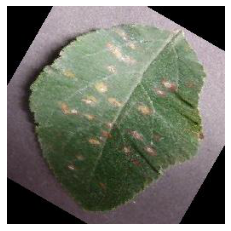

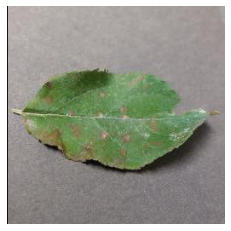

In [4]:
%matplotlib inline
 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
 
pic_index = 2
 
Apple__Apple_scabfiles = os.listdir(Apple__Apple_scab)
next_Apple__Apple_scabfiles = [os.path.join(Apple__Apple_scab, fname) 
                for fname in Apple__Apple_scabfiles[pic_index-2:pic_index]]
 
Apple__healthyfiles = os.listdir(Apple__healthy)
next_Apple__healthyfiles = [os.path.join(Apple__healthy, fname) 
                for fname in Apple__healthyfiles[pic_index-2:pic_index]]
 
Apple__Black_rotfiles = os.listdir(Apple__Black_rot)
next_Apple__Black_rotfiles = [os.path.join(Apple__Black_rot, fname) 
                for fname in Apple__Black_rotfiles[pic_index-2:pic_index]]
 
Apple__Cedar_apple_rustfiles = os.listdir(Apple__Cedar_apple_rust)
next_Apple__Cedar_apple_rustfiles = [os.path.join(Apple__Cedar_apple_rust, fname) 
                for fname in Apple__Cedar_apple_rustfiles[pic_index-2:pic_index]]
 

 
for i, img_path in enumerate(next_Apple__Apple_scabfiles+next_Apple__healthyfiles+next_Apple__Black_rotfiles
                             + next_Apple__Cedar_apple_rustfiles):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [5]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [6]:
TRAINING_DIR = "/tmp/new_dataset/train/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


VALIDATION_DIR = "/tmp/new_dataset/validation"
validation_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=30,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224,224),
	class_mode='categorical'
)


Found 795 images belonging to 4 classes.
Found 339 images belonging to 4 classes.


In [7]:
# VGG 16 CNN Architecture
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The third convolution
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The fourth convolution
    tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The Fifth convolution
    tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 256)       0

In [ ]:

model.compile(loss = 'categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

history = model.fit(train_generator, 
                              epochs=100, 
                              validation_data = validation_generator, 
                              verbose = 0)


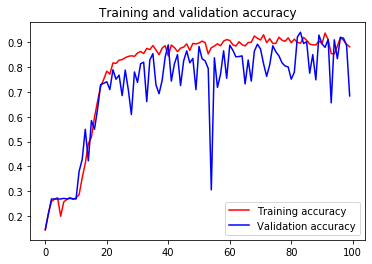

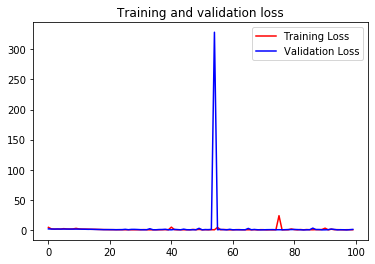

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()